In [ ]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files
import time

# Exercise 5.1
We derive the estimators for the $d=1$ line fitting case. 

1. Let $y_i = m x_i + b +\varepsilon_i$. 
    To find the $\hat{m}$ and $\hat{b}$ estimators that minimize $\sum_{i=1}^n(mx_i + b - y)^2$ we take partial derivatives. 
    \begin{align*}
        \frac{\partial }{\partial m} \sum_{i=1}^n(mx_i + b - y_i)^2&= 0= \sum_{i=1}^n \frac{\partial }{\partial m} (mx_i + b -y_i)^2\\
        =\sum_{i=1}^n 2(mx_i + b - y_i)x_i &= 2\left(\sum_{i=1}^n mx_i^2 + \sum_{i=1}^n x_i b - \sum_{i=1}^n x_i y_i\right)
    \end{align*}
    Similarly 
    \begin{align*}
        \frac{\partial }{\partial b} \sum_{i=1}^n(mx_i + b - y_i)^2&= 0=\sum_{i=1}^n \frac{\partial }{\partial b} (mx_i + b -y_i)^2\\
        =\sum_{i=1}^n 2(mx_i + b -y_i) &= 2\left(\sum_{i=1}^n mx_i +\sum_{i=1}^n b - \sum_{i=1}^n y_i\right)
    \end{align*}
    Which gives us the two equations
    \begin{align*}
        m\sum_{i=1}^n x_i^2 + bn\overline{x} - \sum_{i=1}^n x_i y_i &= 0\\
        m\overline{x} + nb -n\overline{y} &= 0
    \end{align*}
    Which gives us
    \begin{align*}
        m &= \frac{\sum_{i=1}^n x_i y_i - bn\overline{x}}{\sum_{i=1}^n x_i^2}\\
        b &= \overline{y} -m\overline{x}
    \end{align*}
    Where $\overline{y}$ and $\overline{x}$ are the sample mean estimators. 
    
2. We can now show that these are indeed estimators by finding the Hessian matrix. Taking the same partial derivatives with respect to the two functions gives us the following matrix. 
    \begin{align*}
        \begin{bmatrix}
            \sum_{i=1}^n x_i^2 & n\overline{x}\\
            n\overline{x} & n
        \end{bmatrix}
    \end{align*}
        In order order for this to be positive definite we need that 
    \begin{align*}
        n \sum_{i=1}^n {xi}^2 > n^2\overline{x}^2 =\left(\sum_{i=1}^n x_i\right)^2.
     \end{align*}
        By jensens inequality we have that 
     \begin{align*}
        \left(\sum_{i=1}^nx_i\right)\leq   \sum_{i=1}^n x_i^2.
      \end{align*}
       However this only gives positive semidefiniteness but because $n$ is a positive integer then we have that 
      \begin{align*}
        \left(\sum_{i=1}^nx_i\right)< n   \sum_{i=1}^n x_i^2
      \end{align*}
        as desired. 
        

# Exercise 5.2


Problem 5.2 (i)
Known Beta: [2.  0.5]
Calculated Beta: [1.9638955  0.53937725]
Normed Difference: 0.05342380505732093



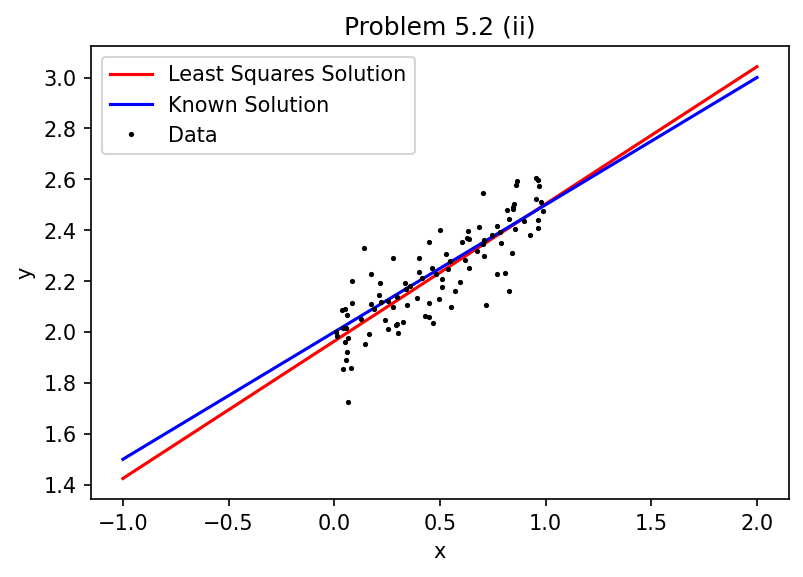

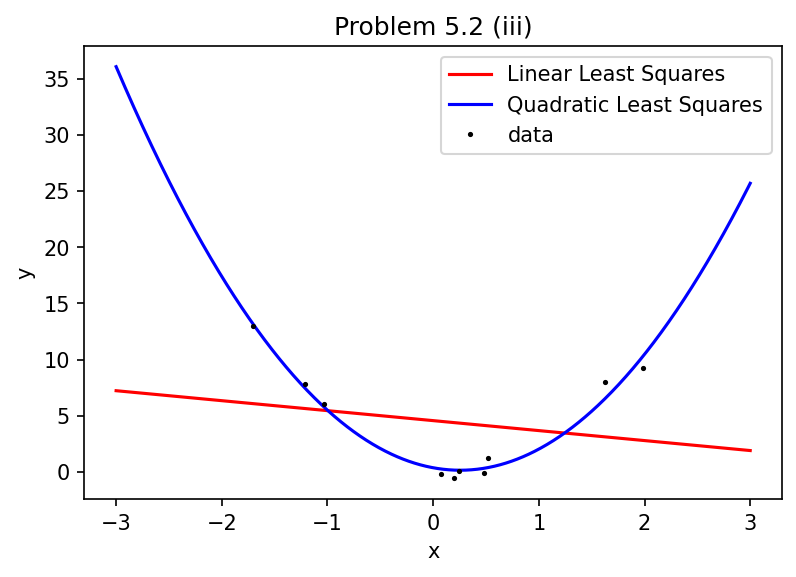


Problem 5.2 (iv)
Known Beta: [1, -2, 3, -4]
Calculated Beta: [ 1.00191129 -1.99904174  3.00321339 -4.0068551 ]
Normed Difference: 0.007866993950759897



In [ ]:
#exercise 2 part 1
def least_squares(X, y):
  ''' This function is a least squares solver 
      Parameters:
          X ((n, d) np.ndarray): the matrix of samples
          y ((n, ) np.ndarray): the array of length n to find the solution to
      Returns:
          beta = (X^TX)^-1 Xy: the least squares solution
  '''

  beta = np.linalg.solve(np.conjugate(X.T)@X, np.conjugate(X.T)@y)
  return beta

def prob2():

  #exercise 2 part 2
  #get random data
  n = 100
  X = np.hstack([np.ones((n, 1)), np.random.random((n, 1))])
  #compare against a known solution
  known_beta =np.array([2, 1/2.])
  e = 0.1*np.random.randn(n)
  y = X @ known_beta + e
  #calcualate our solution
  calculated_beta = least_squares(X, y)

  #compare the two
  print()
  print('Problem 5.2 (i)')
  print('Known Beta:', known_beta)
  print('Calculated Beta:', calculated_beta)
  print('Normed Difference:', linalg.norm(known_beta-calculated_beta))
  print()


  #now we plot the two solutions
  least_squares_sol = lambda x: calculated_beta[0] + calculated_beta[-1]*x
  known_sol = lambda x: known_beta[0] + known_beta[-1]*x
  #get linspace to plot on 
  domain = np.linspace(int(np.floor(np.min(X)) - 1), int(np.ceil(np.max(X)) + 1), 1000)
  #make the plot
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  ax.plot(domain, least_squares_sol(domain), 'r-', label='Least Squares Solution')
  ax.plot(domain, known_sol(domain), 'b-', label='Known Solution')
  ax.plot(X[:, -1], y, 'ko', markersize=1.5, label='Data')
  ax.legend(loc='best')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('Problem 5.2 (ii)')

  #part 3
  x_vals = np.array([-1.7070417, 0.48566752, 1.62940736, -1.03619688, 0.5160501,
                     0.07292432, 0.19432016, 1.98853255, -1.20937744, 0.24718355 ])
  
  y_vals = np.array([12.97711586, -0.07882501, 8.01895309, 6.0190389, 1.28260097, 
                     -0.15612727, -0.5740016, 9.29385226, 7.86261889, 0.05378747])
  #we now want to fit a line
  n = x_vals.size
  X_linear = np.hstack([np.ones((n, 1)), x_vals.reshape(-1, 1)])
  beta_linear = least_squares(X_linear, y_vals)

  #we now want to fit a quadratic
  X_quadratic = np.hstack([np.ones((n, 1)), x_vals.reshape(-1, 1), (x_vals**2).reshape(-1, 1)])
  beta_quadratic = least_squares(X_quadratic, y_vals)

  # we can now plot
  #create our solutions first
  solution_linear = lambda x: beta_linear[0] + beta_linear[-1]*x
  solution_quadratic = lambda x: beta_quadratic[0] + beta_quadratic[1]*x + beta_quadratic[-1]*x**2
  #now we create our domain
  domain = np.linspace(int(np.floor(np.min(x_vals)) -1), int(np.ceil(np.max(x_vals))+1 ), 1000)
  #and plot
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  ax.plot(domain, solution_linear(domain), 'r-', label='Linear Least Squares')
  ax.plot(domain, solution_quadratic(domain), 'b-', label='Quadratic Least Squares')
  ax.plot(x_vals, y_vals, 'ko', markersize=1.5, label='data')
  ax.legend(loc='best')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('Problem 5.2 (iii)')
  plt.show()

  #part 4
  n = 10**6
  X = np.hstack([np.ones((n,1)), 
                 np.random.random((n, 1)), 
                 np.random.random((n, 1)), 
                 np.random.random((n, 1))])
  known_beta =[1, -2, 3, -4]
  e = 0.5 *np.random.randn(n)
  y = X@known_beta + e
  calculated_beta = least_squares(X, y)

  print()
  print('Problem 5.2 (iv)')
  print('Known Beta:', known_beta)
  print('Calculated Beta:', calculated_beta)
  print('Normed Difference:', linalg.norm(known_beta-calculated_beta))
  print()

  return

prob2()

# Exercise 5.3

In [ ]:
uploaded = files.upload()

Saving Datasaurus_Dozen.tsv to Datasaurus_Dozen.tsv


x value averages
{'dino': 54.26327323943664, 'away': 54.26609978420493, 'h_lines': 54.26144178351409, 'v_lines': 54.26992723102747, 'x_shape': 54.26015033403806, 'star': 54.26734110449507, 'high_lines': 54.26880527974155, 'dots': 54.260303451217624, 'circle': 54.26731970617395, 'bullseye': 54.26873002237886, 'slant_up': 54.26588178560211, 'slant_down': 54.2678488233662, 'wide_lines': 54.266916301257034}

x value variances
{'dino': 281.06998759176093, 'away': 281.22702899307916, 'h_lines': 281.09533252964826, 'v_lines': 281.2315118265872, 'x_shape': 281.2314811195687, 'star': 281.1979931971459, 'high_lines': 281.1223635658254, 'dots': 281.156953410042, 'circle': 280.8980243523723, 'bullseye': 281.20739318790345, 'slant_up': 281.19441988924456, 'slant_down': 281.1242056003729, 'wide_lines': 281.23288718662474}

y value averages
{'dino': 47.832252816901374, 'away': 47.83472062488411, 'h_lines': 47.8302519136352, 'v_lines': 47.83698798816882, 'x_shape': 47.839717279160446, 'star': 47.83954

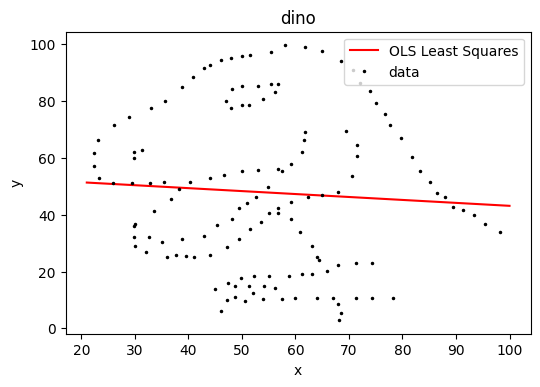

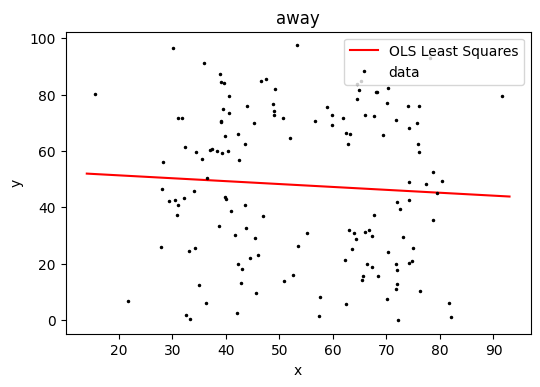

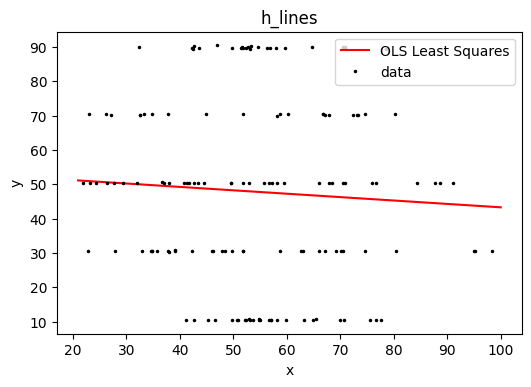

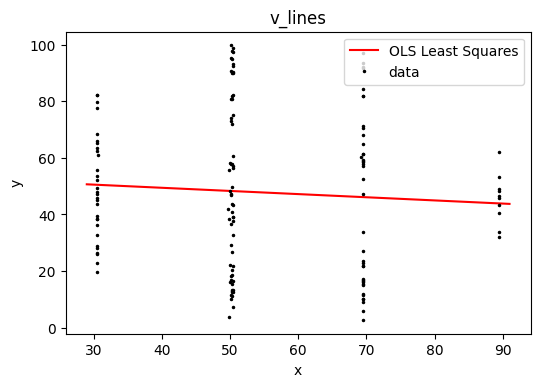

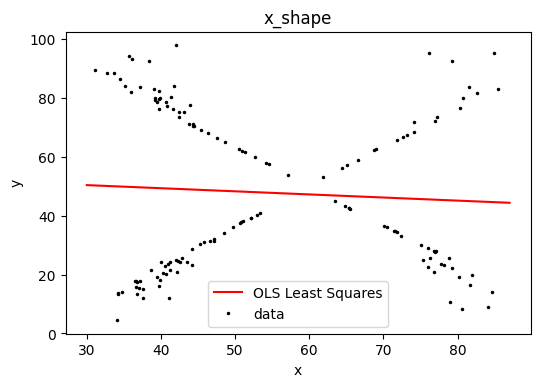

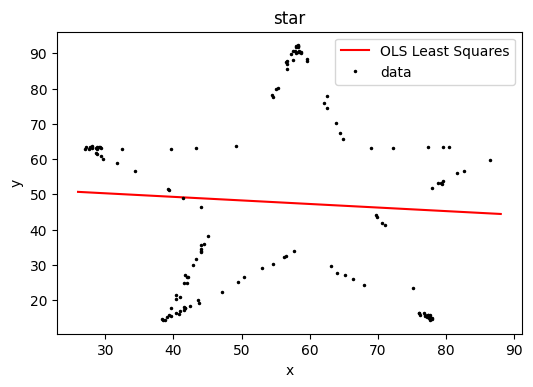

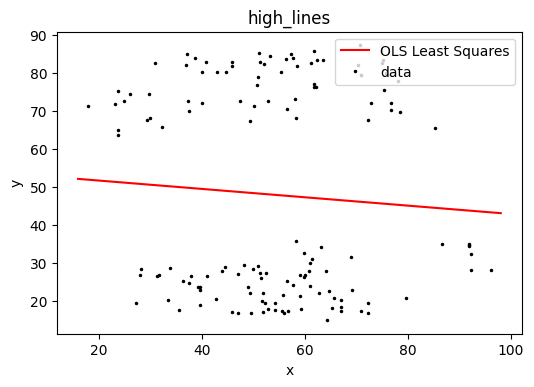

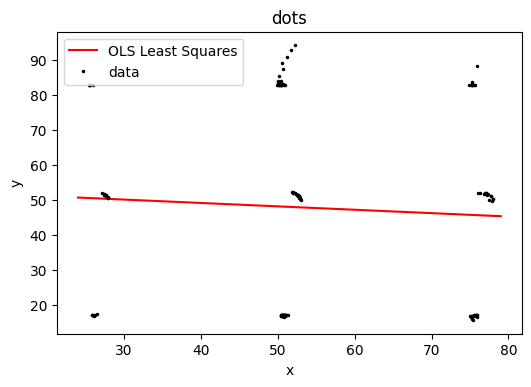

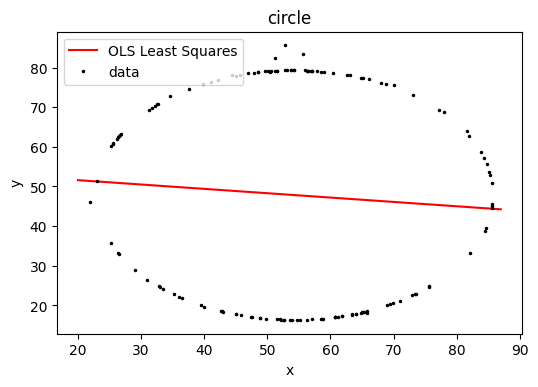

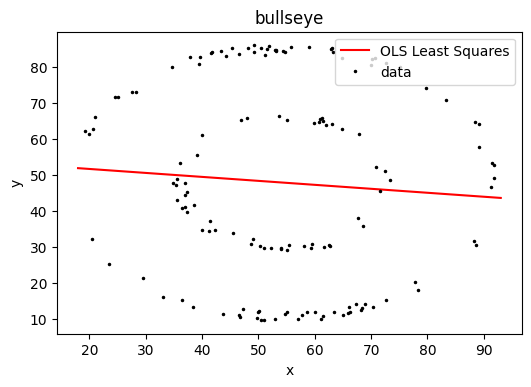

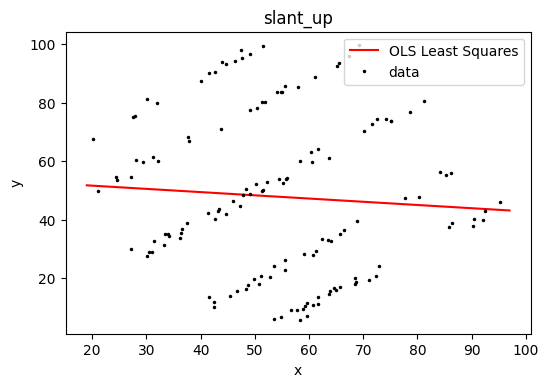

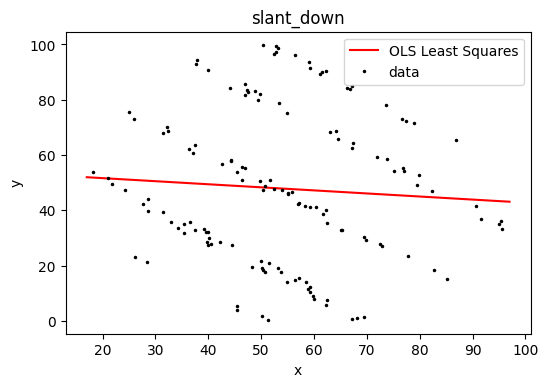

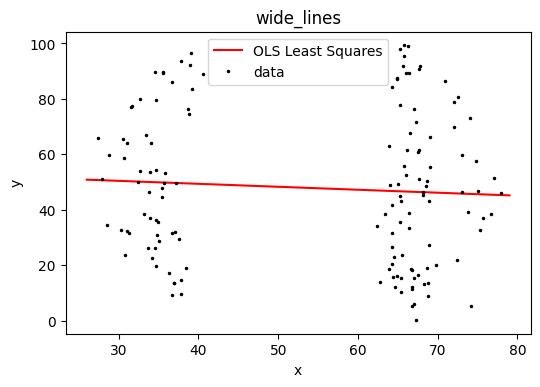

In [ ]:
def prob3():
  df = pd.read_csv('Datasaurus_Dozen.tsv', sep='\t', header=0)
  values = pd.unique(df['dataset'])
  datasets = []
  for val in values:
    indices_val = df['dataset'] == val
    datasets.append(df[indices_val])

  x_mean = {value: dataset['x'].mean() for value, dataset in zip(values, datasets)}
  x_var = {value: dataset['x'].var() for value, dataset in zip(values, datasets)}
  y_mean = {value: dataset['y'].mean() for value, dataset in zip(values, datasets)}
  y_var = {value: dataset['y'].var() for value, dataset in zip(values, datasets)}

  print('x value averages')
  print(x_mean)
  print()
  print('x value variances')
  print(x_var)
  print()
  print('y value averages')
  print(y_mean)
  print()
  print('y value variances averages')
  print(y_var)
  print('As we can see the mean and variances are more or less equivalent')
  print()


  for i, dataset in enumerate(datasets):
    fig = plt.figure()
    fig.set_dpi(100)
    value = values[i]
    x_values = dataset['x']
    y_values = dataset['y']
    n = x_values.size
    X = np.hstack([np.ones((n, 1)), x_values.values.reshape(-1, 1)])
    beta = least_squares(X, y_values.values) 
    OLS = lambda x: beta[0] + beta[-1]*x
    domain = np.linspace(int(np.floor(np.min(x_values)) -1), 
                         int(np.ceil(np.max(x_values)) +1), 1000)
    ax = fig.add_subplot(1,1,1)
    ax.plot(domain, OLS(domain), 'r-', label='OLS Least Squares' )
    ax.plot(x_values.values, y_values.values, 'ko', markersize=1.5, label='data')
    ax.set_title(str(value))
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

    
  return

prob3()

# Exercise 5.4


Problem 5.4 (i.i)
Known Beta: [2.  0.5]
Calculated Beta: [2.02117191 0.44612704]
Normed Difference: 0.05788390029866115



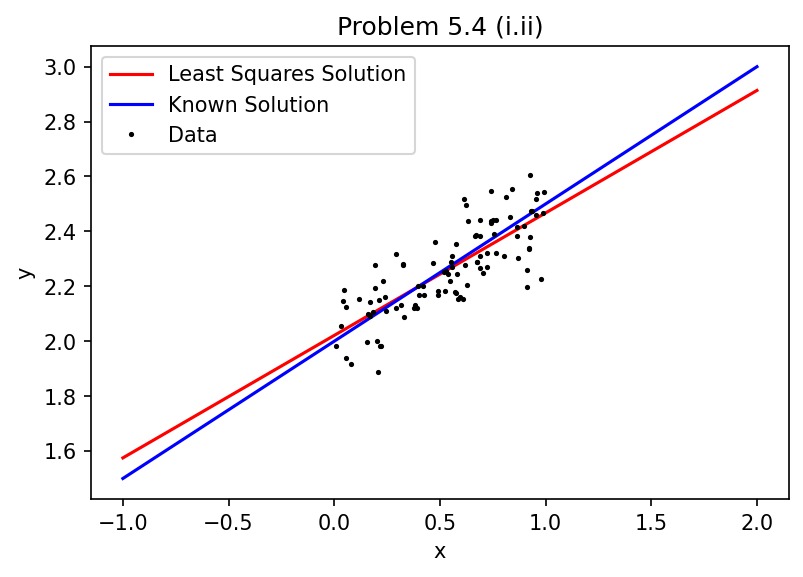

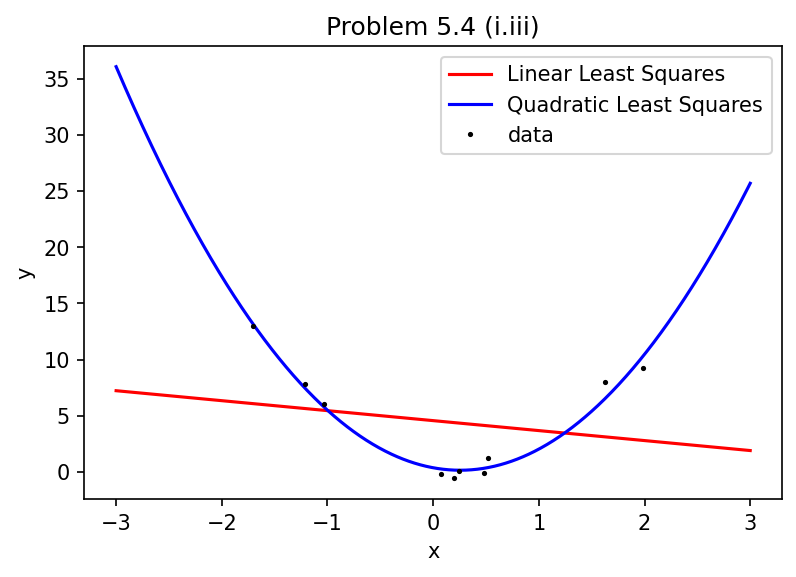


Problem 5.4 (i.iv)
Known Beta: [1, -2, 3, -4]
Calculated Beta: [ 1.00048195 -2.00138874  3.0014399  -4.00076501]
Normed Difference: 0.002195318188989926



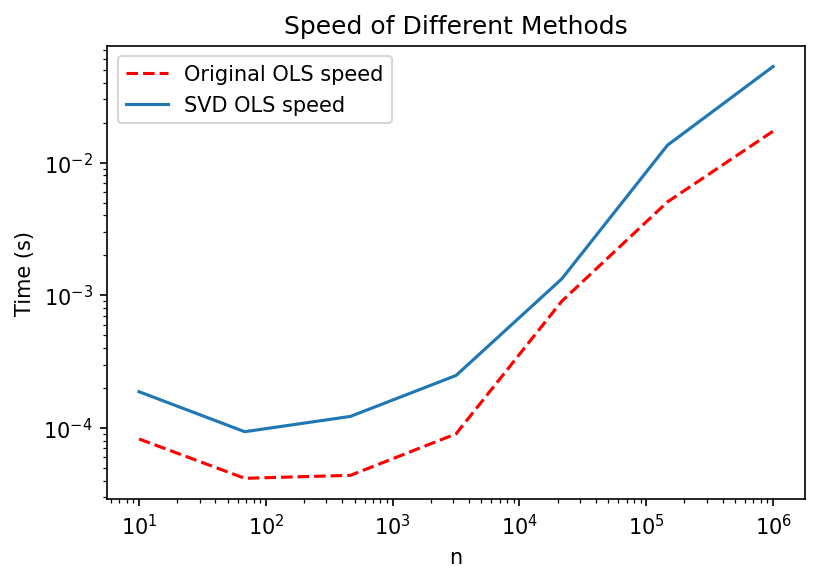


Problem 5.4 (ii)
Known Beta: [ 1 -2  3 -4  5 -6]
Calculated Beta: [-5.85093183e+14 -1.57853613e+14 -1.61320445e+14  5.85093183e+14
  1.57853613e+14  1.61320445e+14]
Normed Difference of Betas: 886877761411869.1
Residuals Average: -0.5371088092794368



In [122]:
#not requiring full rank solver
def least_squares_svd(X, y):
  ''' Compute the least squares solution with
      the svd, can do it with sparse matrices as well
  '''
  U, S, Vt = linalg.svd(X, full_matrices=False)
  return np.conjugate(Vt.T) @ np.diag(1/S) @ np.conjugate(U.T) @ y  

def prob4():

  #repeat problem 2 with least squares solver
  def prob2_2():
    #get random data
    n = 100
    X = np.hstack([np.ones((n, 1)), np.random.random((n, 1))])
    #compare against a known solution
    known_beta =np.array([2, 1/2.])
    e = 0.1*np.random.randn(n)
    y = X @ known_beta + e
    #calcualate our solution
    calculated_beta = least_squares_svd(X, y)

    #compare the two
    print()
    print('Problem 5.4 (i.i)')
    print('Known Beta:', known_beta)
    print('Calculated Beta:', calculated_beta)
    print('Normed Difference:', linalg.norm(known_beta-calculated_beta))
    print()


    #now we plot the two solutions
    least_squares_sol = lambda x: calculated_beta[0] + calculated_beta[-1]*x
    known_sol = lambda x: known_beta[0] + known_beta[-1]*x
    #get linspace to plot on 
    domain = np.linspace(int(np.floor(np.min(X)) - 1), int(np.ceil(np.max(X)) + 1), 1000)
    #make the plot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(domain, least_squares_sol(domain), 'r-', label='Least Squares Solution')
    ax.plot(domain, known_sol(domain), 'b-', label='Known Solution')
    ax.plot(X[:, -1], y, 'ko', markersize=1.5, label='Data')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Problem 5.4 (i.ii)')

    #part 3
    x_vals = np.array([-1.7070417, 0.48566752, 1.62940736, -1.03619688, 0.5160501,
                      0.07292432, 0.19432016, 1.98853255, -1.20937744, 0.24718355 ])
  
    y_vals = np.array([12.97711586, -0.07882501, 8.01895309, 6.0190389, 1.28260097, 
                      -0.15612727, -0.5740016, 9.29385226, 7.86261889, 0.05378747])
    #we now want to fit a line
    n = x_vals.size
    X_linear = np.hstack([np.ones((n, 1)), x_vals.reshape(-1, 1)])
    beta_linear = least_squares_svd(X_linear, y_vals)

    #we now want to fit a quadratic
    X_quadratic = np.hstack([np.ones((n, 1)), x_vals.reshape(-1, 1), (x_vals**2).reshape(-1, 1)])
    beta_quadratic = least_squares(X_quadratic, y_vals)

    #we can now plot
    #create our solutions first
    solution_linear = lambda x: beta_linear[0] + beta_linear[-1]*x
    solution_quadratic = lambda x: beta_quadratic[0] + beta_quadratic[1]*x + beta_quadratic[-1]*x**2
    #now we create our domain
    domain = np.linspace(int(np.floor(np.min(x_vals)) -1), int(np.ceil(np.max(x_vals))+1 ), 1000)
    #and plot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(domain, solution_linear(domain), 'r-', label='Linear Least Squares')
    ax.plot(domain, solution_quadratic(domain), 'b-', label='Quadratic Least Squares')
    ax.plot(x_vals, y_vals, 'ko', markersize=1.5, label='data')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Problem 5.4 (i.iii)')
    plt.show()

  #part 4
    n = 10**6
    X = np.hstack([np.ones((n,1)), 
                  np.random.random((n, 1)), 
                  np.random.random((n, 1)), 
                  np.random.random((n, 1))])
    known_beta =[1, -2, 3, -4]
    e = 0.5 *np.random.randn(n)
    y = X@known_beta + e
    calculated_beta = least_squares_svd(X, y)

    print()
    print('Problem 5.4 (i.iv)')
    print('Known Beta:', known_beta)
    print('Calculated Beta:', calculated_beta)
    print('Normed Difference:', linalg.norm(known_beta-calculated_beta))
    print()

    return
  prob2_2()

  #now we compare speed an accuracy of old solver with new svd solver
  speed_original = []
  speed_svd = []
  n_vals = np.logspace(1, 6, base=10, num=7)
  for n in n_vals:
    n = int(n)
    X = np.hstack([np.ones((n, 1)), np.random.random((n, 1))])
    #compare against a known solution
    e = 0.1*np.random.randn(n)
    known_beta =np.array([2, 1/2.])
    y = X @ known_beta + e
    #time original
    start = time.perf_counter()
    least_squares(X, y)
    end = time.perf_counter()
    speed_original.append(end - start)
    #time svd
    start = time.perf_counter()
    least_squares_svd(X, y)
    end = time.perf_counter()
    speed_svd.append(end - start)

  #plot everything on a log scale
  fig = plt.figure()
  fig.set_dpi(150)
  ax = fig.add_subplot(111)
  ax.loglog(n_vals, speed_original, 'r--', label='Original OLS speed')
  ax.loglog(n_vals, speed_svd, label=r'SVD OLS speed')
  ax.legend(loc='best')
  ax.set_title('Speed of Different Methods')
  ax.set_xlabel('n')
  ax.set_ylabel('Time (s)')
  plt.show()

  #part 2 of problem 4
  n = int(10**3)
  Z = np.random.random((n, 3))
  X = np.hstack([Z,Z])
  known_beta = np.array([1, -2, 3, -4, 5, -6])
  e = 0.5*np.random.randn(n)
  y = X @ known_beta + e

  calculated_beta = least_squares_svd(X, y)
  residuals = y - X @ calculated_beta
  print()
  print('Problem 5.4 (ii)')
  print('Known Beta:', known_beta)
  print('Calculated Beta:', calculated_beta)
  print('Normed Difference of Betas:', linalg.norm(known_beta-calculated_beta))
  print('Residuals Average:', residuals.mean())
  print()

  return

prob4()
